# PDF AudioBook Application

Description: I have created an application using python's text to speech library- pyttsx3 and python's library for performing operations on PDFs -PyPDF2 to create an audiobook application which can read entire PDFs or specific pages according to user input. I have used tkinter to create the UI for this application.

Potential Uses:
Most students prefer downloading pdfs for course textbooks and some may even download novels. Having an application to read out pdfs could be a useful gimmick.

Features: 
This application can read an entire pdf or from a specific page. It can also read a single page. The user can choose from a male voice and a female voice. The user can also choose the speed at which it reads so he doesn't have trouble understanding the audio.

Code : I have written comments to explain functioning(UI created using tkinter)

In [1]:
#importing neccessary libraries
import PyPDF2
import pyttsx3
from tkinter import *
from tkinter.ttk import *   


# creates a Tk() object
master = Tk()

# sets the geometry of main
# root window
master.geometry("350x300")
master.title("Audiobook")
frame= Frame(master, relief= 'sunken')
frame.pack(fill= BOTH, expand= True, padx= 20, pady=30)

Label(frame,
    text ="Select the operation you want to perform -").pack()
# function to open a new window
# on a button click

def getpage():   #function to display input page 
     
   
    newWindow = Toplevel(master)
    
    def printpdf():
        pdfname=name.get()
        book=open(pdfname,'rb')
        pdfreader=PyPDF2.PdfFileReader(book) 
        page_number=int(number.get())
        page=pdfreader.getPage(page_number)
        page_text=page.extractText()
        
        print(page_text)
        
    # sets the title of the
    # Toplevel widget
    newWindow.title("Print PDF")
 
    # sets the geometry of toplevel
    newWindow.geometry("350x300")
    Label(newWindow,
    text = "PDF name").pack()
    name= Entry(newWindow, width= 30)
    name.focus_set()     
    name.pack()
    
    Label(newWindow,
    text ="Page Number (Printed on console)").pack()
    number= Entry(newWindow, width= 30)
    number.focus_set()     
    number.pack()
    
    btn = Button(newWindow, text='Print page',width=30,command=printpdf)
    btn.place(x=205, y=100)
    btn.pack()

def countpages():
    def count():
        pdfname=name.get()
        book=open(pdfname,'rb')
        pdfreader=PyPDF2.PdfFileReader(book)
        pages_number=pdfreader.numPages
        print("The number of pages is ",pages_number)
        
    
         
    newwindow=Toplevel(master)
    
    newwindow.title("Count Pages")
    
    newwindow.geometry("450x350")
    Label(newwindow,
    text ="PDF name").pack()
    name= Entry(newwindow, width= 30)
    name.focus_set() 
    name.pack()
    
    btn = Button(newwindow, text='Count pages',width=30,command=count)
  
    btn.pack()
    
    
def pdfreader():
    def readpdf():
        pdfname=name.get()
        book=open(pdfname,'rb')
        pdfreader=PyPDF2.PdfFileReader(book)
        page_number=number.get()
        if(page_number=="full"):
            for i in range(pdfreader.numPages):                             
                current_page = pdfreader.getPage(i)
                print("===================")
                print("Content on page:" + str(i + 1))
                print("===================")
                print(current_page.extractText())
                speaker.say(current_page.extractText())
                speaker.runAndWait()

        else:
            page=pdfreader.getPage(int(page_number))
            page_text=page.extractText()
            speaker.say(page_text)
            speaker.runAndWait()
            
            
        
       
        
    newwindow=Toplevel(master)     #opens new window on button click
    
    newwindow.title("Read PDF")
    
    #Create an Entry widget to accept User Input
   
    newwindow.geometry("450x350")
    speaker= pyttsx3.init()
    
    Label(newwindow,
    text ="Select voice(male/female)").pack()
    voicenumber= Entry(newwindow, width= 30)
    voicenumber.focus_set() 
    voicenumber.pack()   
    voice1=voicenumber.get()
    
    voices = speaker.getProperty('voices')
    if(voice1=="male"):
        speaker.setProperty('voice', voices[0]. id)
       
    else:
        speaker.setProperty('voice',voices[1].id)       
        
     
       
    Label(newwindow,
    text ="PDF name").pack()
    name= Entry(newwindow, width= 30)
    
    name.focus_set()     
    name.pack()
    
    Label(newwindow,
    text ="Reading rate").pack()
    rate= Entry(newwindow, width= 30)
    rate_number=rate.get()
    speaker.setProperty("rate", rate_number)
    rate.focus_set()     
    rate.pack()
    
    Label(newwindow,
    text ="Page Number (Type full to read the complete PDF)").pack()
    number= Entry(newwindow, width= 30)
    number.focus_set()     
    number.pack()
    
    btn = Button(newwindow, text='Read',width=30,command=readpdf)
    btn.place(x=205, y=100)
    btn.pack()


printbtn = Button(frame, text='Play PDF as Audiobook',width=30,command=pdfreader)

printbtn.pack()

btn2 = Button(frame, text='Display page',width=30,command=getpage)

btn2.pack()

countbtn = Button(frame, text='Count pages',width=30,command=countpages)

countbtn.pack()
# mainloop, runs infinitely


mainloop()

Output screenshots:

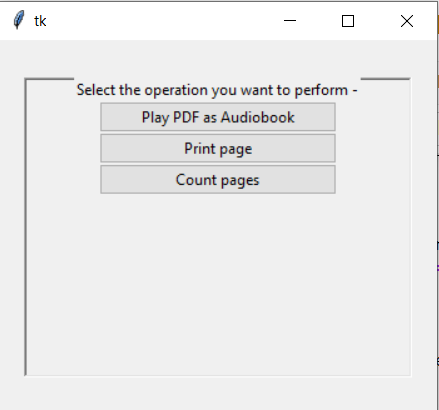

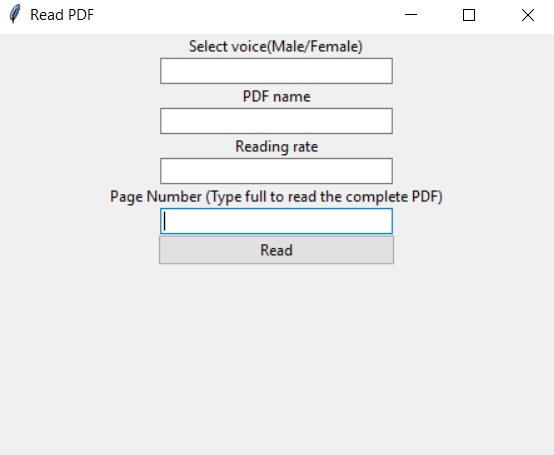

Future improvements:

1) Using pyaudio to add voice commands.

2) Ability to save the audiobook as an mp3 file.

3) Improving the User Interface.

4) Adding reading functionality for other file formats (.txt etc).
